In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [6]:
df['Address'].nunique()

5000

In [7]:
df['Price'].nunique()

5000

In [5]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

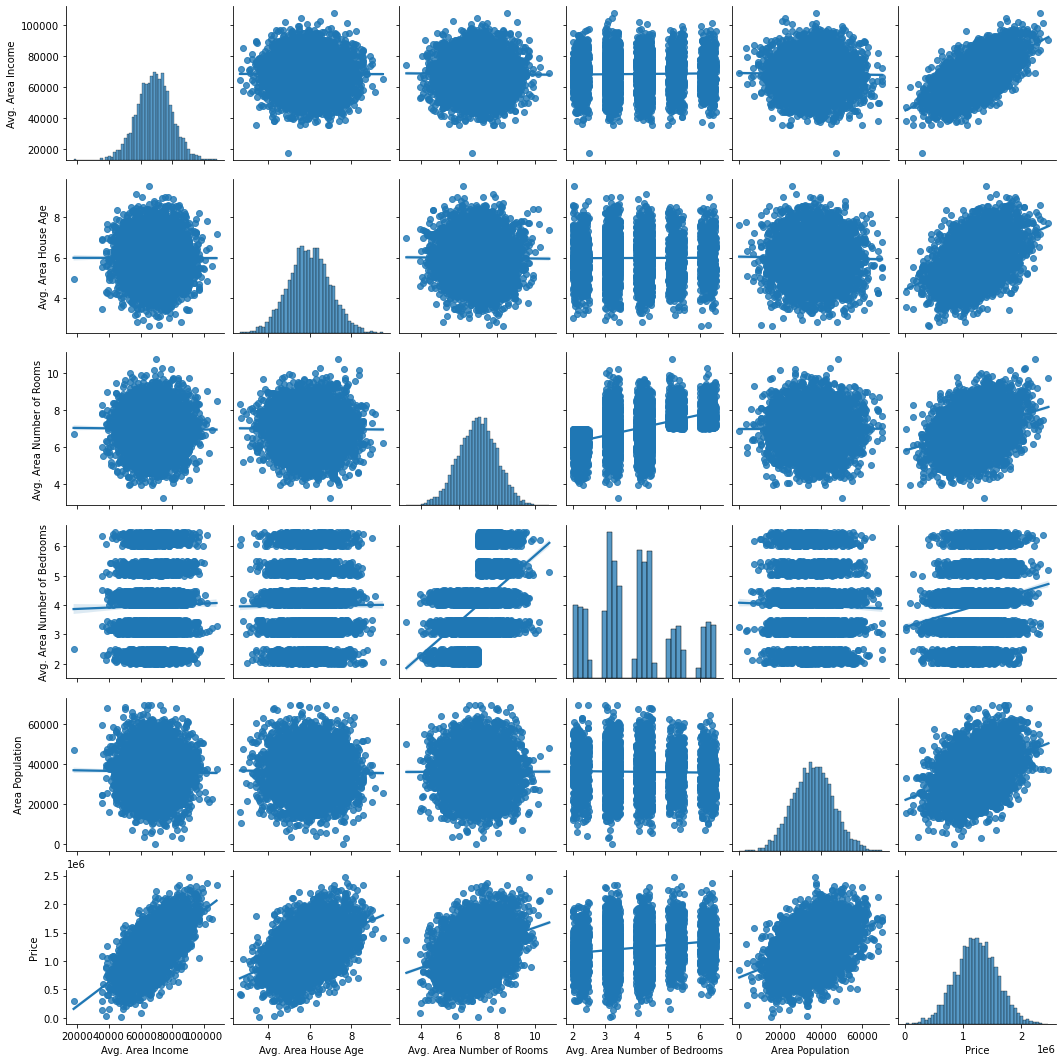

In [10]:
sns.pairplot(data= df, kind='reg')

<AxesSubplot:>

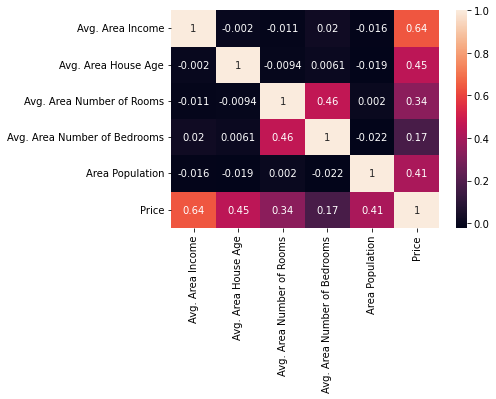

In [8]:
sns.heatmap(df.corr(), annot=True)

In [26]:
target = df['Price']
features = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Area Population']]

In [27]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features, target, test_size=0.25, random_state=101)

In [28]:
xtrain.shape

(3750, 4)

In [29]:
xtest.shape

(1250, 4)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)

LinearRegression()

In [31]:
model.score(xtest, ytext)*100

91.70576659270502

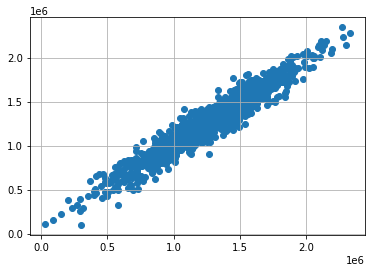

In [32]:
ypred_test = model.predict(xtest)
plt.scatter(ytest, ypred_test)
plt.grid()

In [33]:
xtrain.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Area Population'],
      dtype='object')

In [36]:
query_data = {'Avg. Area Income':[200000], 'Avg. Area House Age':[6], 'Avg. Area Number of Rooms':[5], 'Area Population':[30000]}
result = model.predict(pd.DataFrame(query_data))
print(result[0])

3743363.824275394


In [37]:
pd.to_pickle(model,'housePrice.pickle')